In [ ]:
!pip install deepface
!pip install Pillow #librería de Python para trabajar con imágenes

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

for archivo in glob.glob("/content/foto*.jpg"):
    os.remove(archivo)

# Subir las fotos desde tu PC
uploaded = files.upload()

Saving foto1.jpg to foto1.jpg
Saving foto2.jpg to foto2.jpg
Saving foto3.jpg to foto3.jpg


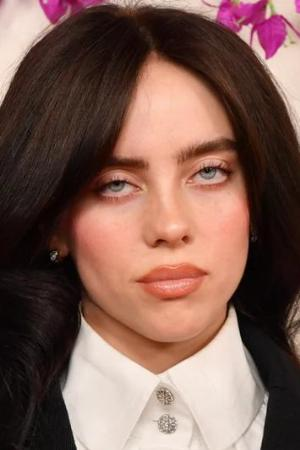

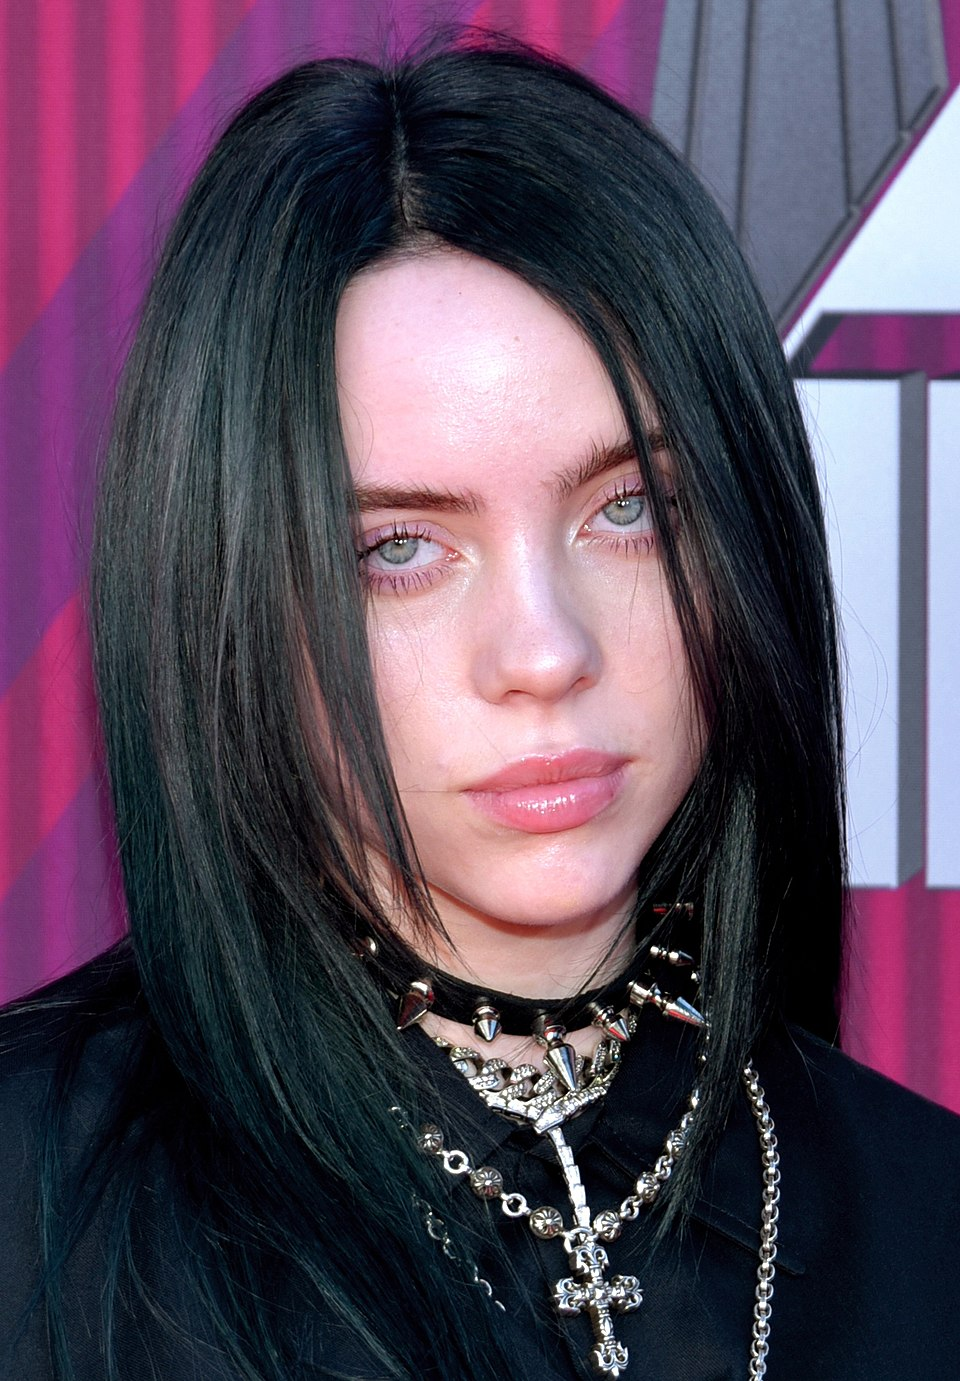

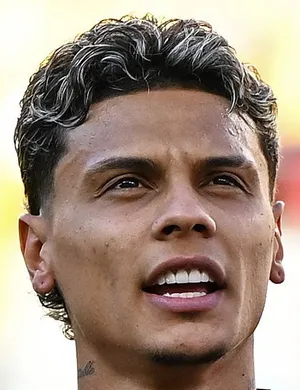

In [ ]:
# Muestra las imágenes EXACTAMENTE como están en el archivo (sin cambios)
from IPython.display import display, Image as IPyImage

img1 = "/content/foto1.jpg"
img2 = "/content/foto2.jpg"
img3 = "/content/foto3.jpg"

for p in (img1, img2, img3):
    display(IPyImage(filename=p))


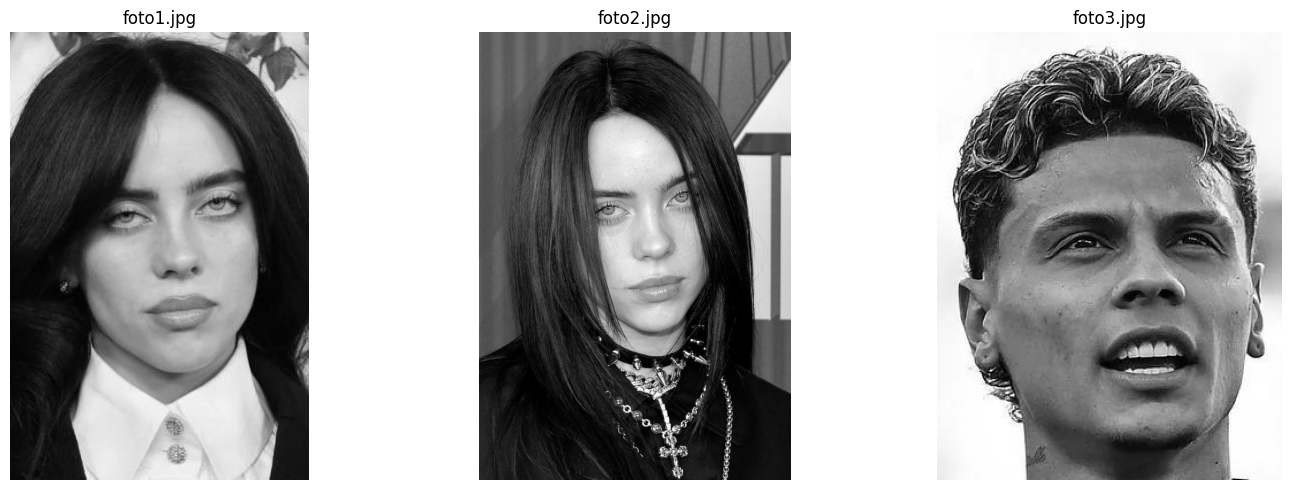

In [ ]:
from PIL import Image
# Mostrar todas en paralelo en blanco y negro
imagenes = []
nombres = []

for nombre in uploaded.keys():
    if nombre.lower().endswith((".png", ".jpg", ".jpeg")):
        img = Image.open(nombre).convert("L")  # convertir a escala de grises
        img.save(nombre)  # guardar sobrescribiendo

        imagenes.append(img)
        nombres.append(nombre)

# Mostrar en una sola fila respetando tamaño original
fig, axes = plt.subplots(1, len(imagenes), figsize=(15, 5))

if len(imagenes) == 1:
    axes = [axes]  # asegurar lista iterable si solo hay una imagen

for ax, img, nombre in zip(axes, imagenes, nombres):
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(nombre)

plt.tight_layout()
plt.show()


In [43]:
# Guardar las imágenes en una lista
imgs = [Image.open(nombre).convert("L") for nombre in uploaded.keys() if nombre.lower().endswith((".png",".jpg",".jpeg"))]

# Obtener el tamaño mínimo entre todas
min_width = min(img.size[0] for img in imgs)
min_height = min(img.size[1] for img in imgs)

# Reescalar todas al mismo tamaño
imgs = [img.resize((min_width, min_height), Image.Resampling.LANCZOS) for img in imgs]

In [47]:
# convertir PIL → numpy array en RGB
emb1 = np.array(DeepFace.represent(np.array(imgs[0].convert("RGB")), model_name=model, detector_backend=detector)[0]["embedding"])
emb2 = np.array(DeepFace.represent(np.array(imgs[1].convert("RGB")), model_name=model, detector_backend=detector)[0]["embedding"])
emb3 = np.array(DeepFace.represent(np.array(imgs[2].convert("RGB")), model_name=model, detector_backend=detector)[0]["embedding"])

Distancia coseno foto1 - foto2: 0.29605175120671845
Distancia coseno foto1 - foto3: 1.0636749154975447
Distancia coseno foto2 - foto3: 0.9950441245014741


In [49]:
# función para calcular distancia coseno
def cosine_distance(a, b):
    a = a / (np.linalg.norm(a) + 1e-10)
    b = b / (np.linalg.norm(b) + 1e-10)
    return 1.0 - np.dot(a, b)

# usar detector retinaface (preciso) -> si falla cambia a "mtcnn" o "opencv"
detector = "retinaface"
model = "ArcFace"

# obtener embeddings
emb1 = np.array(DeepFace.represent(img1, model_name=model, detector_backend=detector)[0]["embedding"])
emb2 = np.array(DeepFace.represent(img2, model_name=model, detector_backend=detector)[0]["embedding"])
emb3 = np.array(DeepFace.represent(img3, model_name=model, detector_backend=detector)[0]["embedding"])

# calcular distancias
d12 = cosine_distance(emb1, emb2)
d13 = cosine_distance(emb1, emb3)
d23 = cosine_distance(emb2, emb3)

print("Distancia coseno foto1 - foto2:", d12)
print("Distancia coseno foto1 - foto3:", d13)
print("Distancia coseno foto2 - foto3:", d23)

# regla práctica para ArcFace + cosine: < 0.35 ≈ misma persona
threshold = 0.35
print("\nResultados:")
print("Foto1 y Foto2 ->", "Misma persona" if d12 < threshold else "Personas diferentes")
print("Foto1 y Foto3 ->", "Misma persona" if d13 < threshold else "Personas diferentes")
print("Foto2 y Foto3 ->", "Misma persona" if d23 < threshold else "Personas diferentes")


Distancia coseno foto1 - foto2: 0.33916693101286954
Distancia coseno foto1 - foto3: 1.0651894285941648
Distancia coseno foto2 - foto3: 1.0316122961323946

Resultados:
Foto1 y Foto2 -> Misma persona
Foto1 y Foto3 -> Personas diferentes
Foto2 y Foto3 -> Personas diferentes
